# Assignment2 - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [4]:
# stundent details: 
#                       student details Noy L. 1627: 
# (if exists)           student details Matan D. 2279: 

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name: ChatGPT (GPT-4)
Goal: קבלה של כל המחלקות שנצטרך להשתמש בהן בעבודה
Propmpt1:יש לנו עבודה שבה נצטרך לבצע תהליך מלא של למידת מכונה על דאטהסט קיים, האם תוכל לתת לי את כל המחלקות שנצטרך במהלך העבודה

Propmpt2: דוגמאות להצגות ויזואליות שונות
    
Propmpt3: 


AI agent name 2:
Goal:
Propmpt1:
    
Propmpt2:
    
Propmpt3: 

Other assistanse:    
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>
מטרת בעיית הלמידה היא לבצע סיווג (classification) של נוסעי הטיטניק – כלומר, לחזות האם נוסע מסוים שרד את הטביעה או לא, בהתבסס על מאפייניו האישיים. הדאטהסט כולל עמודות כמו גיל, מין, מחיר הכרטיס, מחלקת הישיבה, מספר קרובי משפחה שהיו עם הנוסע על הסיפון ועוד. הנתונים עוברים תהליך של עיבוד מוקדם: ניקוי, השלמה לערכים חסרים והמרה לייצוגים נומריים. לאחר מכן מופעלים אלגוריתמים של למידה מונחית, כגון K-Nearest Neighbors (KNN), Naive Bayes ועץ החלטה (Decision Tree), על מנת לאמן מודלים על קבוצת האימון ולבחון את ביצועיהם על קבוצת הבדיקה. ביצועי המודלים נמדדים באמצעות מדדים כמו דיוק (Accuracy), Precision, Recall ו־F1 Score, במטרה לבחור את המודל הטוב ביותר לחיזוי.
</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [11]:
# ייבוא של ספריות רלוונטיות

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB

In [12]:
#פונקציה לטעינת הדאטהסט מקובץ אקסל לתוך דאטהפריים

def load_dataset(file_name):
    df = pd.read_csv(file_name)
    return df

In [13]:
#טעינת הטריין-סט והצגת 5 שורות ראשונות

trainset=load_dataset("titanic_train.csv")
print(trainset.shape)
trainset.head()

(712, 8)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0


In [14]:
#טעינת הטסט-סט והצגת 5 שורות ראשונות

testset=load_dataset("titanic_test.csv")
print(testset.shape)
testset.head()

(179, 8)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,35.000000,0,0,7.0500,0,0
1,3,1,30.000000,0,0,7.2500,0,0
2,3,1,29.699118,0,0,14.5000,0,0
3,3,0,21.000000,0,0,7.7500,2,0
4,3,1,32.000000,0,0,56.4958,0,1


In [15]:
# הצגה טבלאית 1
#תקציר ססטיסטי על הנתונים. למשל: ממוצע, מינימום, מקסימום, סטיית תקן, אחוזונים

trainset.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.294944,0.640449,29.531213,0.528090,0.384831,32.379429,0.372191,0.394663
std,0.841990,0.480206,13.188028,1.055052,0.803085,49.836074,0.649970,0.489122
min,1.000000,0.000000,0.670000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.750000,0.000000,22.000000,0.000000,0.000000,7.925000,0.000000,0.000000
50%,3.000000,1.000000,29.699118,0.000000,0.000000,14.500000,0.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,1.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000,1.000000


In [16]:
# הצגה טבלאית 2
# הצגת העמודות, טיפוס הנתונים בכל עמודה, וכמה ערכים חסרים בעמודה

trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    int64  
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    int64  
 7   Survived  712 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 44.6 KB


In [17]:
# הצגה טבלאית 3
# חישוסב מטריצת המקדמים, שזו מטריצה המודדת את הקשר הלינארי בין שני משתנים
#הערכים נעים בין 1 ל1- כך ש: 1 מצביע על קשר חיובי מושלם, 1- על קשר שלילי מושלם ו-0 על חוסר קשר

corr_matrix = trainset.corr()
corr_matrix

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
Pclass,1.000000,0.126986,-0.319927,0.093572,0.048225,-0.543722,0.040708,-0.324024
Sex,0.126986,1.000000,0.089108,-0.079976,-0.242467,-0.183650,-0.124908,-0.550699
Age,-0.319927,0.089108,1.000000,-0.270404,-0.202725,0.071787,0.031524,-0.072729
SibSp,0.093572,-0.079976,-0.270404,1.000000,0.415491,0.136861,-0.049109,-0.031052
Parch,0.048225,-0.242467,-0.202725,0.415491,1.000000,0.151631,-0.072698,0.074699
Fare,-0.543722,-0.183650,0.071787,0.136861,0.151631,1.000000,0.078197,0.264345
Embarked,0.040708,-0.124908,0.031524,-0.049109,-0.072698,0.078197,1.000000,0.099162
Survived,-0.324024,-0.550699,-0.072729,-0.031052,0.074699,0.264345,0.099162,1.000000


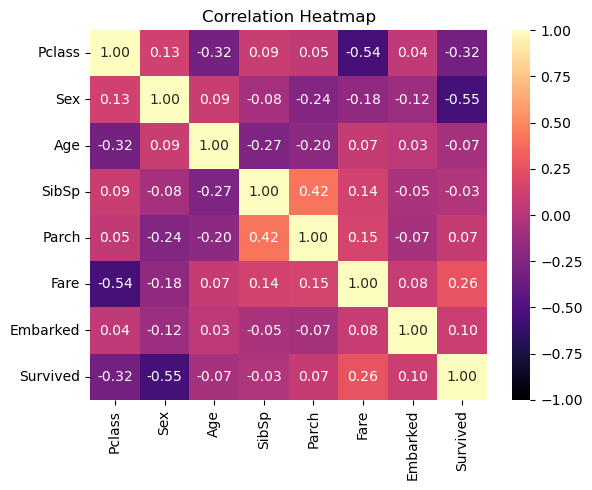

In [18]:
# הצגה ויזואלית 1 
#יצירת מפת חום למטריצת המתאם
#ניתן לראות כאן שעבור הצבע צהוב בהיר- התקשר מושלם כי זה משתנה מול עצמו
#גוונים אדום כתום מראים על קשר חיובי
#גוונים כחולים כהים-שחורים מראים על קשר שלילי
#גוון סגול-ורוד מצביע על חוסר קשר

plt.figure()
sns.heatmap(corr_matrix, annot=True, fmt='.2f',cmap='magma', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

Text(0.5, 1.0, 'Continuous Variables - before scaling...')

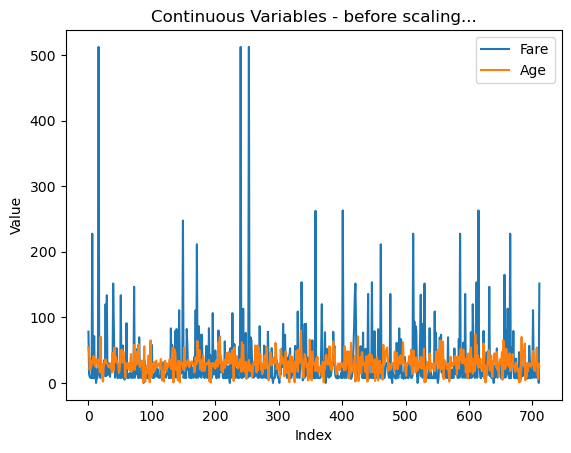

In [19]:
# הצגה ויזואלית 2 
# הנתונים בעלי ערך רציף ובטווחים קיצוניים בין עמודות
#ניתן לראות שהגרף קשה לקריאה וניתוח הנתונים כך עלול לפגוע בתוצאות הניסויים
#בהמשך נראה את הגרף שוב, לאחר ביצוע סקאלינג

continuous_columns = ['Fare','Age']
trainset[continuous_columns].plot()
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Continuous Variables - before scaling...')

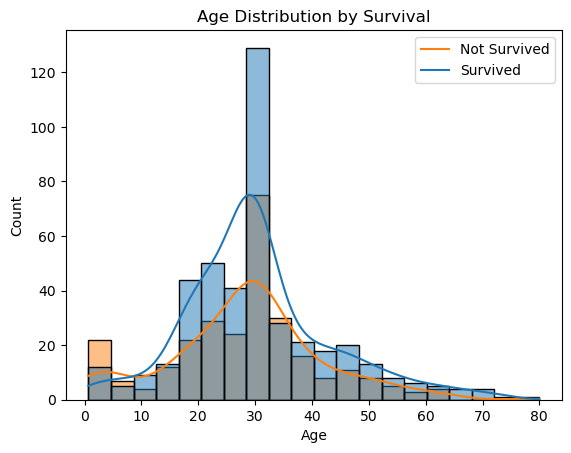

In [20]:
# הצגה ויזואלית 3 
#יצירת גרף התפלגות גיל הנוסעים לפי הישרדותם
#ניתו לראות שרוב הנוסעים שלא שרדו היא בקבוצת הגילאים 20-30 והנוסעים ששרדו היו בעיקר בני 20-40

sns.histplot(data=trainset, x='Age', hue='Survived', kde=True, bins=20)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()

In [21]:
#בדיקת ערכים חסרים
# ניתן לראות שאין ערכים חסרים גם בטריין-סט וגם בטסט-סט, ולכן אין צורך בטיפול בהם

missing_train = trainset.isnull().sum()
missing_test = trainset.isnull().sum()

print(missing_train) 
print('\n')
print(missing_test)

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64


In [22]:
# הוספת עמודה של מספר בני המשפחה בטריין-סט

trainset['FamilySize'] = trainset['SibSp'] + trainset['Parch'] + 1
trainset.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,FamilySize
0,1,0,54.0,1,0,78.2667,1,1,2
1,2,0,45.0,0,0,13.5000,0,1,1
2,3,1,20.0,0,0,9.5000,0,0,1
3,3,1,36.0,0,0,7.8958,0,0,1
4,3,1,22.0,0,0,8.0500,0,0,1


In [23]:
# הוספת עמודה של מספר בני המשפחה בטסט-סט

testset['FamilySize'] = testset['SibSp'] + testset['Parch'] + 1
testset.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,FamilySize
0,3,1,35.000000,0,0,7.0500,0,0,1
1,3,1,30.000000,0,0,7.2500,0,0,1
2,3,1,29.699118,0,0,14.5000,0,0,1
3,3,0,21.000000,0,0,7.7500,2,0,1
4,3,1,32.000000,0,0,56.4958,0,1,1


In [24]:
# יצירת עמודה קטגוריאלית לפי עמודת גיל בטריין-סט

bins = [0, 12, 18, 30, 50, 200]  ## הגדרת גבולות עבור קטגוריות הגיל
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']# הגדרת תוויות עבור כל קטגוריית גיל 
trainset['AgeCategory'] = pd.cut(trainset['Age'], bins=bins, labels=labels) #יצירת העמודה
#מיפוי בין התווית של הקטגוריה לקידוד המספרי
category_mapping = {'Child': 1, 'Teenager': 2, 'Young Adult': 3, 'Adult': 4, 'Senior': 5}
trainset['AgeCategory'] = trainset['AgeCategory'].map(category_mapping) #הגדרת המיפוי בתוך העמודה
trainset.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,FamilySize,AgeCategory
0,1,0,54.0,1,0,78.2667,1,1,2,5
1,2,0,45.0,0,0,13.5000,0,1,1,4
2,3,1,20.0,0,0,9.5000,0,0,1,3
3,3,1,36.0,0,0,7.8958,0,0,1,4
4,3,1,22.0,0,0,8.0500,0,0,1,3


In [25]:
# יצירת עמודה קטגוריאלית לפי עמודת גיל בטסט-סט

bins = [0, 12, 18, 30, 50, 200]  ## הגדרת גבולות עבור קטגוריות הגיל
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']# הגדרת תוויות עבור כל קטגוריית גיל 
testset['AgeCategory'] = pd.cut(testset['Age'], bins=bins, labels=labels) #יצירת העמודה
#מיפוי בין התווית של הקטגוריה לקידוד המספרי
category_mapping = {'Child': 1, 'Teenager': 2, 'Young Adult': 3, 'Adult': 4, 'Senior': 5}
testset['AgeCategory'] = testset['AgeCategory'].map(category_mapping) #הגדרת המיפוי בתוך העמודה
testset.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,FamilySize,AgeCategory
0,3,1,35.000000,0,0,7.0500,0,0,1,4
1,3,1,30.000000,0,0,7.2500,0,0,1,3
2,3,1,29.699118,0,0,14.5000,0,0,1,3
3,3,0,21.000000,0,0,7.7500,2,0,1,3
4,3,1,32.000000,0,0,56.4958,0,1,1,4


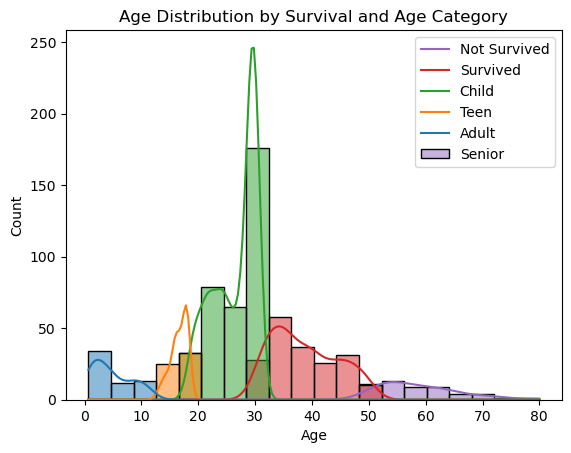

In [28]:
# ויזואליזציה עם עמודת הקטגוריה החדשה לגילאים
#ניתן לראות שהרוב
sns.histplot(data=trainset, x='Age', hue='AgeCategory', kde=True, bins=20)
plt.title('Age Distribution by Survival and Age Category')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived', 'Child', 'Teen', 'Adult', 'Senior'])
plt.show()

In [34]:
# סקאלינג

scaler = MinMaxScaler()  #הגדרת מודל הסקאלינג בו נשתמש
columns_to_scale = ['Age', 'Fare']   #העמודות להן נרצה לבצע סקאלינג
#הפעלת הסקאלינג על המודל בעמודות הנבחרות
trainset[columns_to_scale] = scaler.fit_transform(trainset[columns_to_scale]) 
(trainset['Age']).describe() #בדיקה בה רואים שערך המינימום 0 והמקסימום 1

count    712.000000
mean       0.363812
std        0.166243
min        0.000000
25%        0.268877
50%        0.365929
75%        0.432749
max        1.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Continuous Variables - after scaling...')

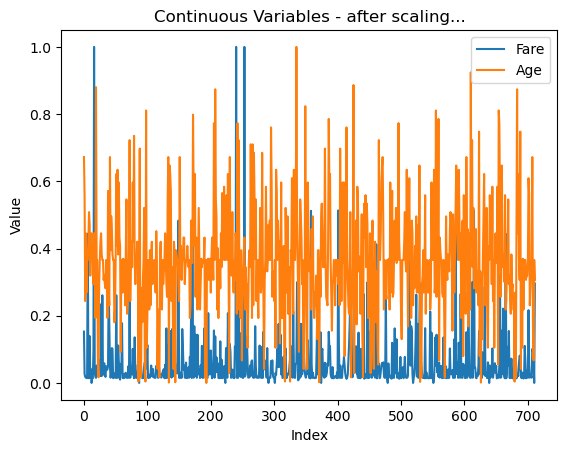

In [35]:
# ויזואליזציה לאחר סקאלינג
#ניתן לראות שכעת הערכים נעים בין 0 ל1

continuous_columns = ['Fare','Age']   #רשימת העמודות של המשתנים הרציפים
trainset[continuous_columns].plot()   #יצירת הגרף
plt.xlabel('Index')                   #כותרת ציר איקס
plt.ylabel('Value')                   #כותרת ציר ווי
plt.title('Continuous Variables - after scaling...')  #כותרת לגרף

## Part 3 - Experiments
You could add as many code cells as needed

In [39]:
# אימון וחיזוי לפי אלגוריתם KNN
# הקוד מבצע את שלבי הכנת הנתונים, חלוקת הנתונים, אימון המודל, חיזוי תוצאות הבדיקה וחישוב דיוק המודל

# בחירת עמודות התכונות ועמודת המטרה מתוך קבוצות האימון והבדיקה 
X_train = trainset[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex']]
y_train = trainset['Survived']
X_test = testset[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex']]
y_test = testset['Survived']

knn_model = KNeighborsClassifier(n_neighbors=5)  # הגדרת מודל KNN עם 5 שכנים קרובים
knn_model.fit(X_train, y_train)  # התאמת המודל על קבוצת האימון
y_pred = knn_model.predict(X_test)  # חיזוי התגובות על קבוצת הבדיקה
accuracy = accuracy_score(y_test, y_pred)  # מדידת הדיוק של המודל
print("Accuracy of KNN model:", accuracy)  # הדפסת תוצאת הדיוק

Accuracy of KNN model: 0.7094972067039106


In [40]:
# אימון וחיזוי לפי אלגוריתם Naive Bayes

nb_model = GaussianNB()  # הגדרת מודל Naive Bayes
nb_model.fit(X_train, y_train)  # התאמת המודל על קבוצת האימון
y_pred_nb = nb_model.predict(X_test)  # חיזוי התגובות על קבוצת הבדיקה
accuracy_nb = accuracy_score(y_test, y_pred_nb)  # מדידת הדיוק של המודל
print("Accuracy of Naive Bayes model:", accuracy_nb)  # הדפסת תוצאת הדיוק

Accuracy of Naive Bayes model: 0.3407821229050279


In [42]:
# אימון וחיזוי לפי אלגוריתם עץ החלטה

dt_model = DecisionTreeClassifier() # הגדרת מודל עץ החלטה
dt_model.fit(X_train, y_train)  # התאמת המודל על קבוצת האימון
y_pred_dt = dt_model.predict(X_test)  # חיזוי התגובות על קבוצת הבדיקה
accuracy_dt = accuracy_score(y_test, y_pred_dt)  # מדידת הדיוק של המודל
print("Accuracy of Decision Tree model:", accuracy_dt)   # הדפסת תוצאת הדיוק

Accuracy of Decision Tree model: 0.7821229050279329


In [45]:
param_grid_knn = {                    # הגדרת טווחי היפרפרמטרים למודל KNN  
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
param_grid_dt = {                        # הגדרת טווחי היפרפרמטרים למודל העץ החלטה 
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# יצירת פונקציה לביצוע Grid Search וחישוב המדדים
def run_grid_search_and_evaluation(X_train, y_train, X_test, y_test, model, param_grid):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    best_model.fit(X_train, y_train)
    
    y_pred = best_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    return {
        'Model': model.__class__.__name__,
        'Best Parameters': grid_search.best_params_,
        'Best CV Accuracy': grid_search.best_score_,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

results = []   # יצירת רשימה לאחסון התוצאות


models = [    # יצירת מודלים
    ('KNN', KNeighborsClassifier(), param_grid_knn),
    ('Decision Tree', DecisionTreeClassifier(), param_grid_dt)
]

# ביצוע Grid Search וחישוב המדדים עבור כל מודל
for name, model, param_grid in models:
    result = run_grid_search_and_evaluation(X_train, y_train, X_test, y_test, model, param_grid)
    results.append(result)

results_df = pd.DataFrame(results)  # המרת הרשימה לדאטה פריים
results_df   # הדפסת הטבלה הסופית עם התוצאות

,Model,Best Parameters,Best CV Accuracy,Accuracy,Precision,Recall,F1 Score
0,KNeighborsClassifier,"{'metric': 'manhattan', 'n_neighbors': 3, 'wei...",0.790771,0.782123,0.711538,0.606557,0.654867
1,DecisionTreeClassifier,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.797745,0.787709,0.676923,0.721311,0.698413


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [53]:
best_model = Pipeline([   #הגדרת המודל הטוב ביותר 
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', SimpleImputer(strategy='mean'), ['Age', 'Fare']),
            ('cat', SimpleImputer(strategy='most_frequent'), ['Sex']),
        ],
        remainder='passthrough'
    )),
    ('classifier', DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=2, min_samples_leaf=1))
])

best_model.fit(X_train, y_train)  #אימון המודל
y_pred = best_model.predict(X_test) # חיזוי ומדידת ביצועי המודל על קבוצת הבדיקה
# חישוב מדדים על קבוצת הבדיקה
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

#הדפסת המדדים והתוצאות
print("Evaluation Metrics for the Best Decision Tree Model:\n")
print(f"Accuracy on test set: {accuracy}")
print(f"Precision on test set: {precision}")
print(f"Recall on test set: {recall}")
print(f"F1 Score on test set: {f1}")

Evaluation Metrics for the Best Decision Tree Model:

Accuracy on test set: 0.7877094972067039
Precision on test set: 0.676923076923077
Recall on test set: 0.7213114754098361
F1 Score on test set: 0.6984126984126984


## Part 5 - Apply on test and show model performance estimation

In [62]:
# יישום Feature Engineering האופטימליים על הטסט סט 
X_test_processed = best_model.named_steps['preprocessor'].transform(X_test)
y_pred_test = best_model.predict(X_test) #חיזוי התוצאות על הטסט-סט
accuracy_test = accuracy_score(y_test, y_pred_test)  #חישוב דיוק התוצאות על הטסט-סט
# יצירת DataFrame עם החיזויים והערכים האמיתיים
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_test
})

print("\nתוצאות חיזוי נוספות:")
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('\n')
# הדפסת הטבלה עם החיזויים לעומת הערכים האמיתיים
print("תוצאות חיזוי ודיוק המודל על הטסט-סט:\n")
print("Predictions vs. Actuals on Test Set:")
results_df.head(30)


תוצאות חיזוי נוספות:
Precision: 0.676923076923077
Recall: 0.7213114754098361
F1 Score: 0.6984126984126984


תוצאות חיזוי ודיוק המודל על הטסט-סט:

Predictions vs. Actuals on Test Set:


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,1
4,1,0
5,1,1
6,0,1
7,0,0
8,1,1
9,0,0
